In [189]:
# Import lib
import os, shutil
import numpy as np
from keras import regularizers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
#from keras.layers.normalization.batch_normalization import BatchNormalization
#Compilation stage
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [190]:
#Copying images to training, validation, and test directories
#Path where dataset is stored
base_dir = 'C:/Users/nguye/Thermal-Face-Recognition-CNN/thermal_images/'
#os.mkdir(base_dir)
# Directories for the training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
print(train_dir)
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

C:/Users/nguye/Thermal-Face-Recognition-CNN/thermal_images/train


In [191]:
# proposed model
num_classes = 18
batch = 32
weight_decay = 1e-4
model = models.Sequential()
model.add(Conv2D(batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(72, 96, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

model.add(Conv2D(2*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(2*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.3))

model.add(Conv2D(4*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(4*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_135 (Conv2D)          (None, 72, 96, 32)        320       
_________________________________________________________________
activation_120 (Activation)  (None, 72, 96, 32)        0         
_________________________________________________________________
batch_normalization_135 (Bat (None, 72, 96, 32)        128       
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 72, 96, 32)        9248      
_________________________________________________________________
activation_121 (Activation)  (None, 72, 96, 32)        0         
_________________________________________________________________
batch_normalization_136 (Bat (None, 72, 96, 32)        128       
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 36, 48, 32)      

In [192]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4, decay=1e-6), #Decrease learning rate
              metrics=['accuracy'])

In [193]:
#Using ImageDataGenerator to read images from directories
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [194]:
train_generator = train_datagen.flow_from_directory(
        train_dir, # Target directory
        target_size=(72, 96), # All images are resized from 240x320 to 72x96
        batch_size=2, 
        color_mode='grayscale',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(72, 96),
        batch_size=2,
        color_mode='grayscale',
        class_mode='categorical')

Found 1926 images belonging to 18 classes.
Found 900 images belonging to 18 classes.


In [195]:
#Training and validation stages
history = model.fit(
      train_generator,
      steps_per_epoch=200, 
      epochs= 50,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/50
200/200 [==============================] - 19s 84ms/step - loss: 0.5894 - accuracy: 0.8875 - val_loss: 3.1160 - val_accuracy: 0.0500
Epoch 2/50
200/200 [==============================] - 17s 87ms/step - loss: 0.0360 - accuracy: 1.0000 - val_loss: 2.7411 - val_accuracy: 0.1750
Epoch 3/50
200/200 [==============================] - 18s 88ms/step - loss: 0.0337 - accuracy: 0.9975 - val_loss: 0.1056 - val_accuracy: 0.9700
Epoch 4/50
200/200 [==============================] - 20s 100ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 0.1281 - val_accuracy: 0.9600
Epoch 5/50
200/200 [==============================] - 19s 97ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.1998 - val_accuracy: 0.9500
Epoch 6/50
200/200 [==============================] - 20s 102ms/step - loss: 0.0139 - accuracy: 0.9950 - val_loss: 0.1295 - val_accuracy: 0.9400
Epoch 7/50
200/200 [==============================] - 19s 93ms/step - loss: 0.0097 - accuracy: 0.9975 - val_loss: 0.2867 - val_accurac

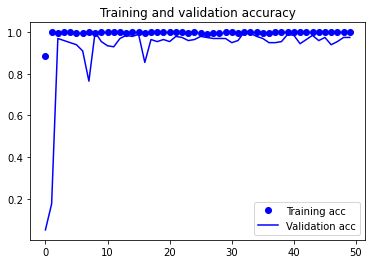

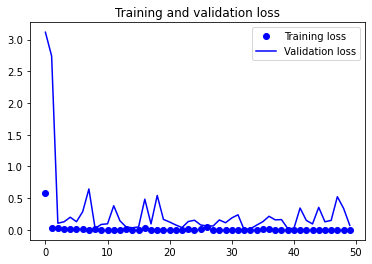

In [196]:
#Plot of the loss and accuracy during training

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [197]:
#The proposed model is defined again

num_classes = 18
batch = 32
weight_decay = 1e-4
model = models.Sequential()
model.add(Conv2D(batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(72, 96, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

model.add(Conv2D(2*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(2*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.3))

model.add(Conv2D(4*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(4*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_141 (Conv2D)          (None, 72, 96, 32)        320       
_________________________________________________________________
activation_126 (Activation)  (None, 72, 96, 32)        0         
_________________________________________________________________
batch_normalization_141 (Bat (None, 72, 96, 32)        128       
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 72, 96, 32)        9248      
_________________________________________________________________
activation_127 (Activation)  (None, 72, 96, 32)        0         
_________________________________________________________________
batch_normalization_142 (Bat (None, 72, 96, 32)        128       
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 36, 48, 32)      

In [198]:
#Compilation stage
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4, decay=1e-6), #Decrease learning rate
              metrics=['accuracy'])

In [199]:
#Retraining from scratch
history = model.fit(
      train_generator,
      steps_per_epoch=200,
      epochs= 26)

Epoch 1/26
200/200 [==============================] - 16s 70ms/step - loss: 0.5079 - accuracy: 0.9000
Epoch 2/26
200/200 [==============================] - 14s 70ms/step - loss: 0.0449 - accuracy: 0.9950
Epoch 3/26
200/200 [==============================] - 15s 73ms/step - loss: 0.0368 - accuracy: 0.9975
Epoch 4/26
200/200 [==============================] - 15s 77ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 5/26
200/200 [==============================] - 16s 78ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 6/26
200/200 [==============================] - 16s 80ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 7/26
200/200 [==============================] - 16s 81ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 8/26
200/200 [==============================] - 16s 79ms/step - loss: 0.0066 - accuracy: 0.9975
Epoch 9/26
200/200 [==============================] - 16s 80ms/step - loss: 0.0316 - accuracy: 0.9975
Epoch 10/26
200/200 [==============================] - 16s 80ms/step - loss: 0.023

In [76]:
# The model is saved
#model.save('face_reg_cnn.h5')

In [200]:
#Test stage
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(72, 96),
        batch_size=2,
        color_mode='grayscale',
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=200)

Found 1260 images belonging to 18 classes.
200/200 [==============================] - 6s 28ms/step - loss: 0.4994 - accuracy: 0.9700


In [201]:
#Rank-1 recognition rate
print('test acc:', test_acc)

test acc: 0.9700000286102295


In [202]:
train_generator.class_indices

{'face01': 0,
 'face02': 1,
 'face03': 2,
 'face04': 3,
 'face07': 4,
 'face08': 5,
 'face09': 6,
 'face10': 7,
 'face11': 8,
 'face12': 9,
 'face13': 10,
 'face14': 11,
 'face15': 12,
 'face16': 13,
 'face17': 14,
 'face18': 15,
 'face19': 16,
 'face20': 17}

In [29]:
train_generator.classes[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
train_generator.filenames

['face01\\0001.jpg',
 'face01\\0002.jpg',
 'face01\\0003.jpg',
 'face01\\0004.jpg',
 'face01\\0005.jpg',
 'face01\\0006.jpg',
 'face01\\0007.jpg',
 'face01\\0008.jpg',
 'face01\\0009.jpg',
 'face01\\0010.jpg',
 'face01\\0011.jpg',
 'face01\\0012.jpg',
 'face01\\0013.jpg',
 'face01\\0014.jpg',
 'face01\\0015.jpg',
 'face01\\0016.jpg',
 'face01\\0017.jpg',
 'face01\\0018.jpg',
 'face01\\0019.jpg',
 'face01\\0020.jpg',
 'face01\\0021.jpg',
 'face01\\0022.jpg',
 'face01\\0023.jpg',
 'face01\\0024.jpg',
 'face01\\0025.jpg',
 'face01\\0026.jpg',
 'face01\\0027.jpg',
 'face01\\0028.jpg',
 'face01\\0029.jpg',
 'face01\\0030.jpg',
 'face01\\0031.jpg',
 'face01\\0032.jpg',
 'face01\\0033.jpg',
 'face01\\0034.jpg',
 'face01\\0035.jpg',
 'face01\\0036.jpg',
 'face01\\0037.jpg',
 'face01\\0038.jpg',
 'face01\\0039.jpg',
 'face01\\0040.jpg',
 'face01\\0041.jpg',
 'face01\\0042.jpg',
 'face01\\0043.jpg',
 'face01\\0044.jpg',
 'face01\\0045.jpg',
 'face01\\0046.jpg',
 'face01\\0047.jpg',
 'face01\\004